# CodeNation - Pré-processamento de dados - Black Friday

Olá cientista, tudo bem com você? Esse foi o primeiro desafio proposto pela **CodeNation** da **Aceleração em Data Science**.

Para esse desafio, vamos trabalhar com o data set **[Black Friday](https://github.com/lpcaldeira/codenation-data-science-desafio-1-black-friday/arquivos/black_friday.csv)**, que reúne dados sobre transações de compras em uma loja de varejo.

Aqui vou mostrar um guia de como alcancei **100%**, acertando as 10 questões.

Caso queira as informações sobre o desafio e os arquivos, basta dar uma olhada no meu repositório do git [CodeNation-Desafio-1-Black-Friday](https://github.com/lpcaldeira/codenation-data-science-desafio-1-black-friday)

- Este tutorial foi feito utilizando o Google Colab
- Baixe os arquivos no repositório citado acima e faça upload do **black_friday.csv** no menu lateral a esquerda em Files > Upload

##Visão geral sobre os dados

Importando as libs que serão utilizadas

In [0]:
import pandas as pd
import numpy as np

Importando o arquivo

In [3]:
bf = pd.read_csv("black_friday.csv")
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Informações gerais do dataset.

In [31]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Podemos ver que na informação _Non-Null_ acima, os campos Product_Category_2 e Product_Category_3 possuem muitos valores faltantes.

In [5]:
bf.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

Se precisássemos montar modelos a partir deste dataset, estes nulos poderiam ser um problema, mas para estas questões, isso não será necessário.

## EDA

Importando as libs gráficas

In [0]:
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt;

Abaixo podemos ver a disparidade entre homens e mulheres que realizaram compras e as suas idades.

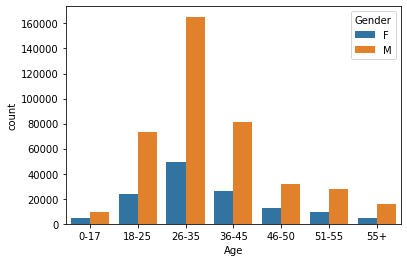

In [33]:
sns.countplot(bf['Age'].sort_values(), hue = bf['Gender']);

Checando a dependência entre gênero e valor da compra

In [8]:
bf[['Gender', 'Purchase']].groupby('Gender').mean()

,Purchase
Gender,
F,8809.761349
M,9504.771713


Conseguimos ver que a média distorce bastante o valor

In [9]:
bf[['Gender', 'Purchase']].groupby('Gender').sum()

,Purchase
Gender,
F,1164624021
M,3853044357


Podemos fazer o mesmo para saber qual a Idade com maior poder aquisitivo neste período do ano.

Ou mesmo para ocupação e cidade.

In [10]:
bf[['Age', 'Purchase']].groupby('Age').sum().sort_values(by = 'Purchase', ascending = False)

,Purchase
Age,
26-35,1999749106
36-45,1010649565
18-25,901669280
46-50,413418223
51-55,361908356
55+,197614842
0-17,132659006


As análises acima foram apenas para entender um pouco melhor o *dataset*.

Agora vamos ver as questões solicitadas.

## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [11]:
def q1():
    # observações são as linhas
    return bf.shape

q1()

(537577, 12)

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

Observando os valores únicos no campo Age (idade)

In [12]:
print("Valores únicos: ", bf.Age.sort_values().unique())
print("Quantidade de valores únicos: ", bf.Age.nunique())

Valores únicos:  ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
Quantidade de valores únicos:  7


Observando os valores únicos no campo Gender (sexo)

In [13]:
print("Valores únicos: ", bf.Gender.unique())
print("Quantidade de valores únicos: ", bf.Gender.nunique())

Valores únicos:  ['F' 'M']
Quantidade de valores únicos:  2


Será que existem mulheres que se enquadram nesta idade?

In [14]:
# Se você adicionar a função .shape[0] no fim deste comando abaixo, já vai obter a resposta para esta questão
bf.query('Gender == "F" & Age == "26-35"')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
47,1000011,P00192642,F,26-35,1,C,1,0,8,17.0,NaN,6171
48,1000011,P00110842,F,26-35,1,C,1,0,1,2.0,5.0,19327
49,1000011,P00189642,F,26-35,1,C,1,0,8,13.0,NaN,8027
124,1000024,P00346642,F,26-35,7,A,3,1,8,NaN,NaN,2230
125,1000024,P00205642,F,26-35,7,A,3,1,5,8.0,NaN,6940
...,...,...,...,...,...,...,...,...,...,...,...,...
537092,1004659,P00196542,F,26-35,14,C,0,0,5,8.0,14.0,5336
537288,1004692,P00176242,F,26-35,7,C,3,0,8,NaN,NaN,6197
537289,1004692,P00015642,F,26-35,7,C,3,0,8,16.0,17.0,6187
537290,1004692,P00069142,F,26-35,7,C,3,0,7,NaN,NaN,16335


Já que existem ranges de idades, fica bem mais fácil pra gente obter esses valores, pois podemos só buscar os registros que se enquadram no Age = 26-35 e Gender = F.

In [15]:
def q2():
    return bf.query('Gender == "F" & Age == "26-35"').shape[0]

q2()

49348

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

Este é fácil, basta considerar que a feature User_ID são os usuários, então é só utilizar o comando ***.nunique()*** para verificar quantos únicos existe no bf inteiro.

In [16]:
def q3():
    return bf.User_ID.nunique()

q3()

5891

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

Os tipos de dados nós vimos lá no começo quando executamos o comando ***.info()***, lembra? De forma, fácil, vamos ver apenas o tipos agora:

In [17]:
def q4():
    # a letra 'n' na frente do comando '.unique()', faz a soma dos valores que o comando iria nos retornar
    return bf.dtypes.nunique()

q4()

3

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

Este item é resolvido com matemática básica, pois é um percentual que precisamos descobrir.

Para isso, basta:
1.   pegar a quantidade total de linhas com o **_shape[0]_**
2.   menos a quantidade total de linhas não nulas com o **_dropna().shape[0]_**
3.   dividido pela quantidade total de linhas com o **_shape[0]_**

In [18]:
def q5():
    # (quantidade total de linhas - quantidade total de linhas não nulas) / quantidade total de linhas
    return (bf.shape[0] - bf.dropna().shape[0]) / bf.shape[0]

q5()

0.6944102891306734

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

Para resolver este, devemos fazer um passo a menos do que o de cima, pois precisamos da quantidade e não do percentual.

In [19]:
def q6():
    # quantidade total de linhas - quantidade total de linhas não nulas
    return bf.shape[0] - bf.dropna().shape[0]

q6()

373299

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

Para o pessoal de estatistica, o valor mais frequente é chamado de **MODA**. No Python, podemos encontrá-la utilizando o comando **_.mode()_** que p **Pandas** nos fornece.

In [20]:
def q7():
    return float(bf.Product_Category_3.mode())

q7()

16.0

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

Primeiro, precisamos entender o que é ***normalização***: Normalização é o processo de ajustar dados em uma escala comum, para que diferentes tipos de dados possam ser comparados.

Caso não tenha ficado claro, vamos usar a fórmula e fazer passo a passo.

A fórmula é assim:
normalizado = (total - valor minimo) / (valor máximo - valor mínimo)

![Fórmula para normalizar um valor](https://miro.medium.com/max/682/0*oRhJXkyKqqYp8--e.)

In [21]:
# Primeira parte
(bf['Purchase'] - bf['Purchase'].min())

0          8185
1         15015
2          1237
3           872
4          7784
          ...  
537572    11479
537573    19011
537574     7858
537575     6987
537576     6690
Name: Purchase, Length: 537577, dtype: int64

In [22]:
# Segunda parte
(bf['Purchase'].max() - bf['Purchase'].min())

23776

In [23]:
# Terceira parte / agora é só dividir a Primeira pela Segunda parte e aplicar o método .mean()
normalized = (bf['Purchase'] - bf['Purchase'].min()) / (bf['Purchase'].max() - bf['Purchase'].min())
float(normalized.mean())

0.38479390362696736

In [24]:
def q8():
    return float(normalized.mean())

q8()

0.38479390362696736

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

Para padronizar estes valores entre -1 e 1, utilizamos a seguinte fórmula:

![Fórmula para a padronização](https://miro.medium.com/max/1024/0*PXGPVYIxyI_IEHP7.)

Ou seja, para encontrar a padronização (z), a fórmula é:

(bf['Purchase'] - média) / desvio padrão

In [25]:
# O Pandas já nos fornece os comandas .mean, para média, e .std, para o desvio padrão
standardized = (bf['Purchase'] - bf['Purchase'].mean()) / bf['Purchase'].std()
# Vamos utilizar o comando .between() que nos diz se o valor da linha está entre os valores que colocamos no betwen (-1 e 1)
standardized.between(-1, 1)

0          True
1         False
2         False
3         False
4          True
          ...  
537572     True
537573    False
537574     True
537575     True
537576     True
Name: Purchase, Length: 537577, dtype: bool

In [26]:
def q9():
    # Agora que já temos os TRUE e FALSE, basta somar para termos apenas os TRUE
    return int(standardized.between(-1, 1).sum())

q9()

348631

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

Vamos explorar um pouco os valores de ***Product_Category_2***

In [27]:
# Quantidade de valores nulos em Product_Category_2
len(bf.query("Product_Category_2 == 'NaN'"))

166986

In [28]:
# Quantidade de valores nulos em Product_Category_2 que NÃO são nulos em Product_Category_3
len(bf.query("Product_Category_2 == 'NaN' & Product_Category_3 != 'NaN'"))

0

Parece que sempre que Product_Category_2 for nulos, Product_Category_3 também será.

Vamos tirar a prova real:

In [29]:
# Quantidade de valores nulos em Product_Category_2 que TAMBÉM são nulos em Product_Category_3
len(bf.query("Product_Category_2 == 'NaN' & Product_Category_3 == 'NaN'"))

166986

In [30]:
def q10():
    # Se Product_Category_2 for nulo e Product_Category_3 também, então é TRUE.
    # Ou seja, sempre que o Product_Category_2 for nulo, Product_Category_3 também será
    return bool(len(bf.query("Product_Category_2 == 'NaN' & Product_Category_3 == 'NaN'")))

q10()

True

## E aí, você conseguiu entender tudo sobre o desafio? Caso tenha dúvidas, fique a vontade para entrar em contato comigo.

## Acompanhe Descomplicando a Ciência de Dados para ver os próximos desafios :D